#  Problem Statement :


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



#  Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Assignment:

#  Importing important libraries:



In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels
import sklearn

# Reading the csv file

In [135]:
inp1= pd.read_csv("day.csv")

In [136]:
#Having a look at the dataset
inp1.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [137]:
inp1.shape

(730, 16)

So, there are **16** columns and **730** rows as entries in the dataset.

In [138]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [139]:
inp1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Dealing with the variables :

Few of the variables seems to be unwanted and complex to study, They should be dealt with proper procedures. Let's do that:


In [140]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [141]:
inp1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


clearly **instant** is having just the index of the dataset. So, we can take a call of dropping it.

In [142]:
inp1.drop(['instant'], axis=1, inplace=True)
inp1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Next, we can see that **dteday** has the complete date record but we are already provided with the month and year, which are sufficient to move ahead. So, we can drop it too.

In [143]:
inp1.drop(['dteday'], axis=1, inplace=True)
inp1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


From the data dictionary we can see that **cnt** is the sum total of **casual** and **registered** columns. So, as we know that **cnt** is the target variable, we can surely drop **casual** and the **registered** columns.

In [144]:
inp1.drop(['casual', 'registered'], axis=1, inplace=True)
inp1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [145]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Renaming & Replacing the variables 

For an easy readability let's rename the columns **yr** as **year**, **mnth** as **month**, **temp** as **temperature**, **hum** as **humidity** and **cnt** as **count**

In [146]:
inp1.rename(columns={'yr':'year','mnth':'month','temp': 'temperature','hum':'humidity','cnt':'count'}, inplace = True) 
inp1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Mapping the **season** and **weathersit** column according the data dictionary we're provided

In [147]:
inp1['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
inp1['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
inp1.head()


,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


For a clear understanding let's  replace values of **month** and **weekday** columns according to the actual readable values.

In [148]:
inp1['month'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},inplace=True)
inp1['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
inp1.head(20)

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,January,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,January,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,January,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,January,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,January,0,Wednesday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


#  Visualising the data

In [149]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  count        730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Visualising the numeric value columns first. i.e **temperature**, **atemp**, **humitidity**, **windspeed** and **count**.

<Figure size 432x288 with 0 Axes>

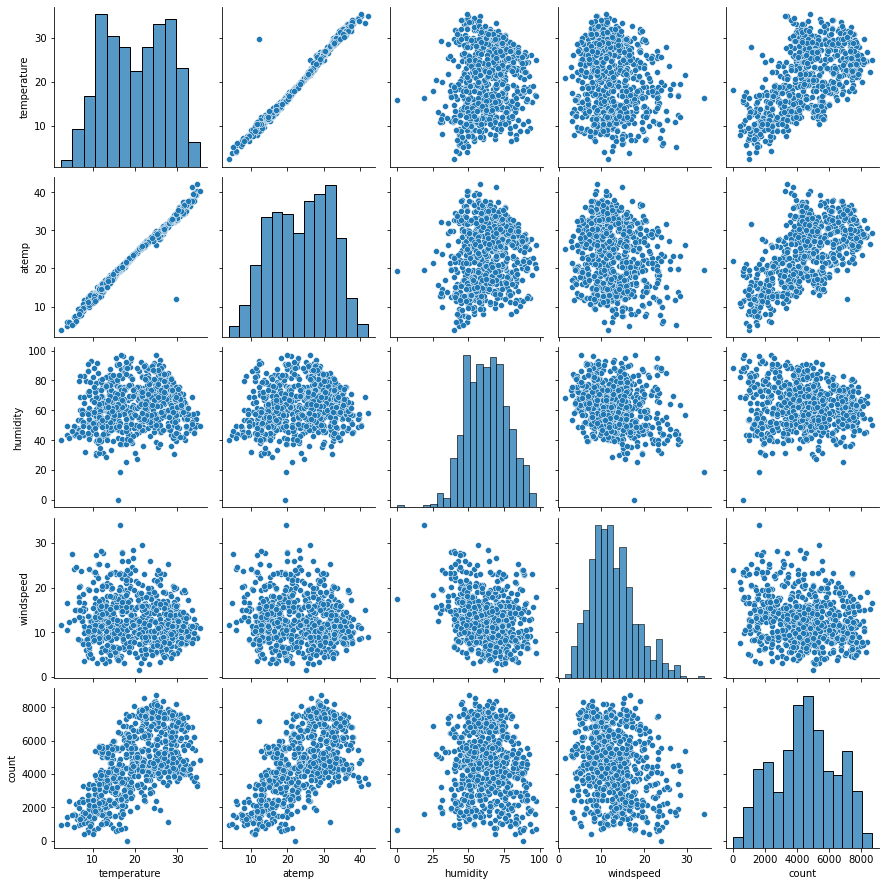

In [150]:
plt.figure()
sns.pairplot(data= inp1,  vars=['temperature','atemp', 'humidity', 'windspeed', 'count']);

Visualising the correlation among the variables.

<AxesSubplot:>

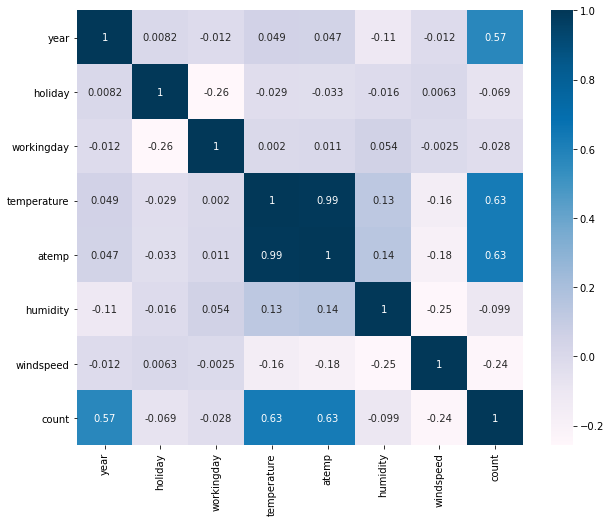

In [151]:
plt.figure(figsize=(10,8))
sns.heatmap(inp1.corr(), annot=True, cmap='PuBu')

Visualising other variables w.r.t the target variable **count**.

#### W.r.t to 'Season' 

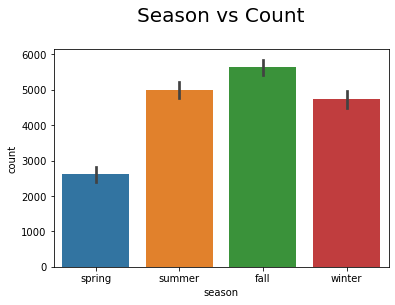

In [152]:
sns.barplot('season','count',data=inp1)
plt.title('Season vs Count', fontsize=20, y=1.1);

We can clearly observe that the bikes were shared mostly in the **fall** season followed by **summer**, **winter** and the least in **spring**.

#### W.r.t 'Year' 

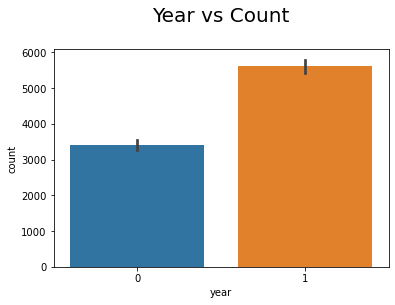

In [153]:
sns.barplot('year','count',data=inp1)
plt.title('Year vs Count', fontsize=20, y=1.1);

Year **2019** i.e **1** recorded the more numbers of bike sharing compared to that in year **2018** i.e **0**.

#### W.r.t 'Month' 

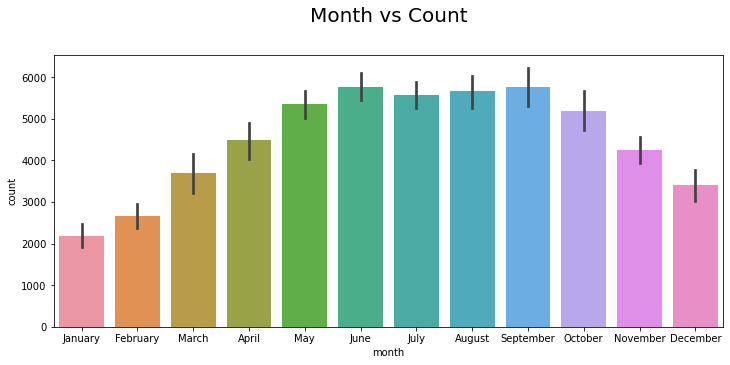

In [154]:
plt.figure(figsize=(12,5))
sns.barplot('month','count',data=inp1)
plt.title('Month vs Count', fontsize=20, y=1.1);

Months from **May** to **October** recorded highest bike sharings.

#### W.r.t 'Weekday' # 

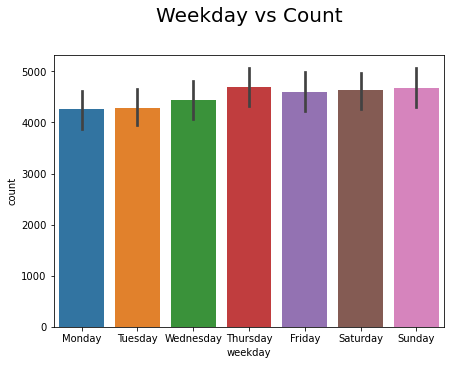

In [155]:
plt.figure(figsize=(7,5))
sns.barplot('weekday','count',data=inp1)
plt.title('Weekday vs Count', fontsize=20, y=1.1);

According to the above visualisation it seems that the distribution of bike sharing was almost uniform in terms of weekdays.

#### W.r.t 'Weathersit' 

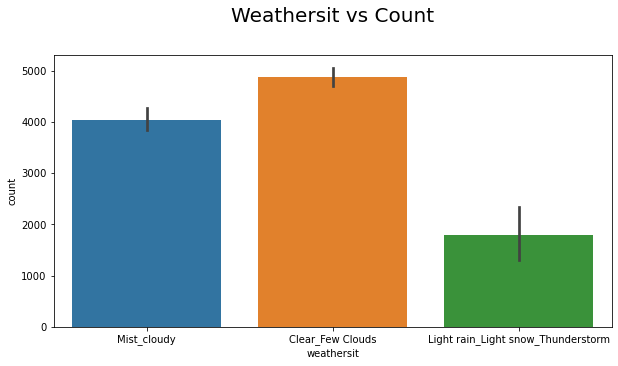

In [156]:
plt.figure(figsize=(10,5))
sns.barplot('weathersit','count',data=inp1)
plt.title('Weathersit vs Count', fontsize=20, y=1.1);

Lowest bike sharing was recorded in the weather of **Light rain/Light snow/Thunderstrorm**, which is quite understandable.

#### W.r.t 'Workingday' 

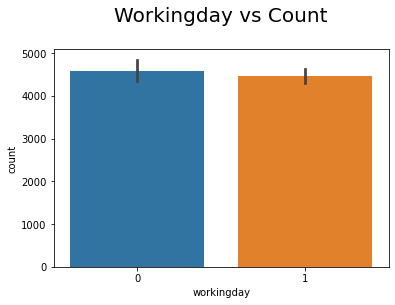

In [157]:
sns.barplot('workingday','count',data=inp1)
plt.title('Workingday vs Count', fontsize=20, y=1.1);

There's no such significant difference between the number of bikes shared in workingdays.

#### W.r.t 'Temperature' 

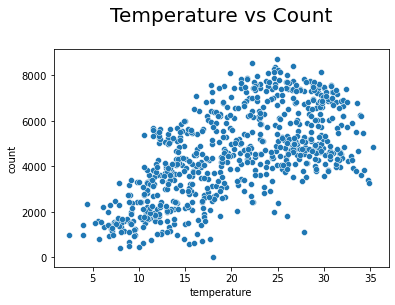

In [158]:
sns.scatterplot('temperature','count',data=inp1)
plt.title('Temperature vs Count', fontsize=20, y=1.1);

Most of the data lies in the temperature between **15-35 celcius**.

#### W.r.t 'Humidity'  

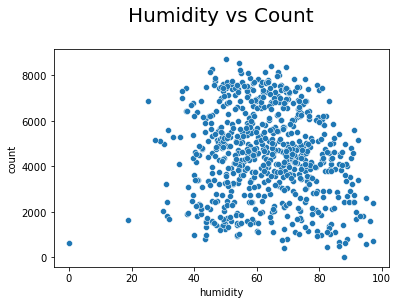

In [159]:
sns.scatterplot('humidity','count',data=inp1)
plt.title('Humidity vs Count', fontsize=20, y=1.1);

Usully the bikes were shared in the High humidity days.

# Creating Dummy variables 

A **dummy variable** is a binary variable that indicates whether a separate categorical variable takes on a specific value.

So, observing the dataset the variables for which we've to create dummy variables are:

**month**

**season**

**weekday**

**weathersit**

In [160]:
dummy_categories=inp1[['season','month','weekday','weathersit']]

In [161]:
dummy_categories= pd.get_dummies(dummy_categories,drop_first=True )


In [162]:
dummy_categories.head()

,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the above dummy variables are created from the original variables.

In [163]:
dummy_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   season_spring                                  730 non-null    uint8
 1   season_summer                                  730 non-null    uint8
 2   season_winter                                  730 non-null    uint8
 3   month_August                                   730 non-null    uint8
 4   month_December                                 730 non-null    uint8
 5   month_February                                 730 non-null    uint8
 6   month_January                                  730 non-null    uint8
 7   month_July                                     730 non-null    uint8
 8   month_June                                     730 non-null    uint8
 9   month_March                                    730 non-null    uint8
 10  mo

As, we now have the dummy variables, we can easily drop the original variables to avoid confusion and complexity in reading the data.

In [164]:
inp1.drop(inp1[['season','weathersit','weekday','month']],axis=1,inplace=True)

In [165]:
inp1.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


Concatting both the dummy variables with the original dataset to move ahead.

In [166]:
inp1= pd.concat([dummy_categories,inp1],axis = 1)

In [167]:
inp1.head(10)

,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,6.765000,8.11270,53.5833,17.875868,959
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,6.184153,7.54440,48.2917,14.958889,1321


In [168]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   season_spring                                  730 non-null    uint8  
 1   season_summer                                  730 non-null    uint8  
 2   season_winter                                  730 non-null    uint8  
 3   month_August                                   730 non-null    uint8  
 4   month_December                                 730 non-null    uint8  
 5   month_February                                 730 non-null    uint8  
 6   month_January                                  730 non-null    uint8  
 7   month_July                                     730 non-null    uint8  
 8   month_June                                     730 non-null    uint8  
 9   month_March                                    730 non

#  Splitting the train-test data:

Importing *train_test_split* from **sklearn**

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
#splitting the train and test sets
inp1_train, inp1_test = train_test_split(inp1, train_size = 0.7, random_state = 100)

In [171]:
#looking at the train set : inp1_train
inp1_train.head()

,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,13.803347,16.0977,72.9583,14.707907,1683


In [172]:
inp1_train.shape

(510, 30)

In [173]:
#looking at the test set : inp1_test
inp1_test.head()

,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,29.793347,33.27085,63.7917,5.459106,6043
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,32.082500,36.04875,59.2083,7.625404,6211
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,19.270000,22.85230,81.2917,13.250121,2659
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,31.433347,34.24915,42.4167,13.417286,4780
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,29.315000,32.19710,30.5000,19.583229,4968


In [174]:
inp1_test.shape

(220, 30)

## Rescaling some features

Importing library for scaling the dataset

In [175]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [176]:
#creating a new dataset with numeric variables that are to be scaled.
numeric_vars=['temperature', 'windspeed', 'atemp', 'humidity', 'count']

In [177]:
inp1_train[numeric_vars]=scaler.fit_transform(inp1_train[numeric_vars])

In [178]:
inp1_train.head()

,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095


In [179]:
inp1_train.describe()

,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the correlation among the variables in the inp1_train


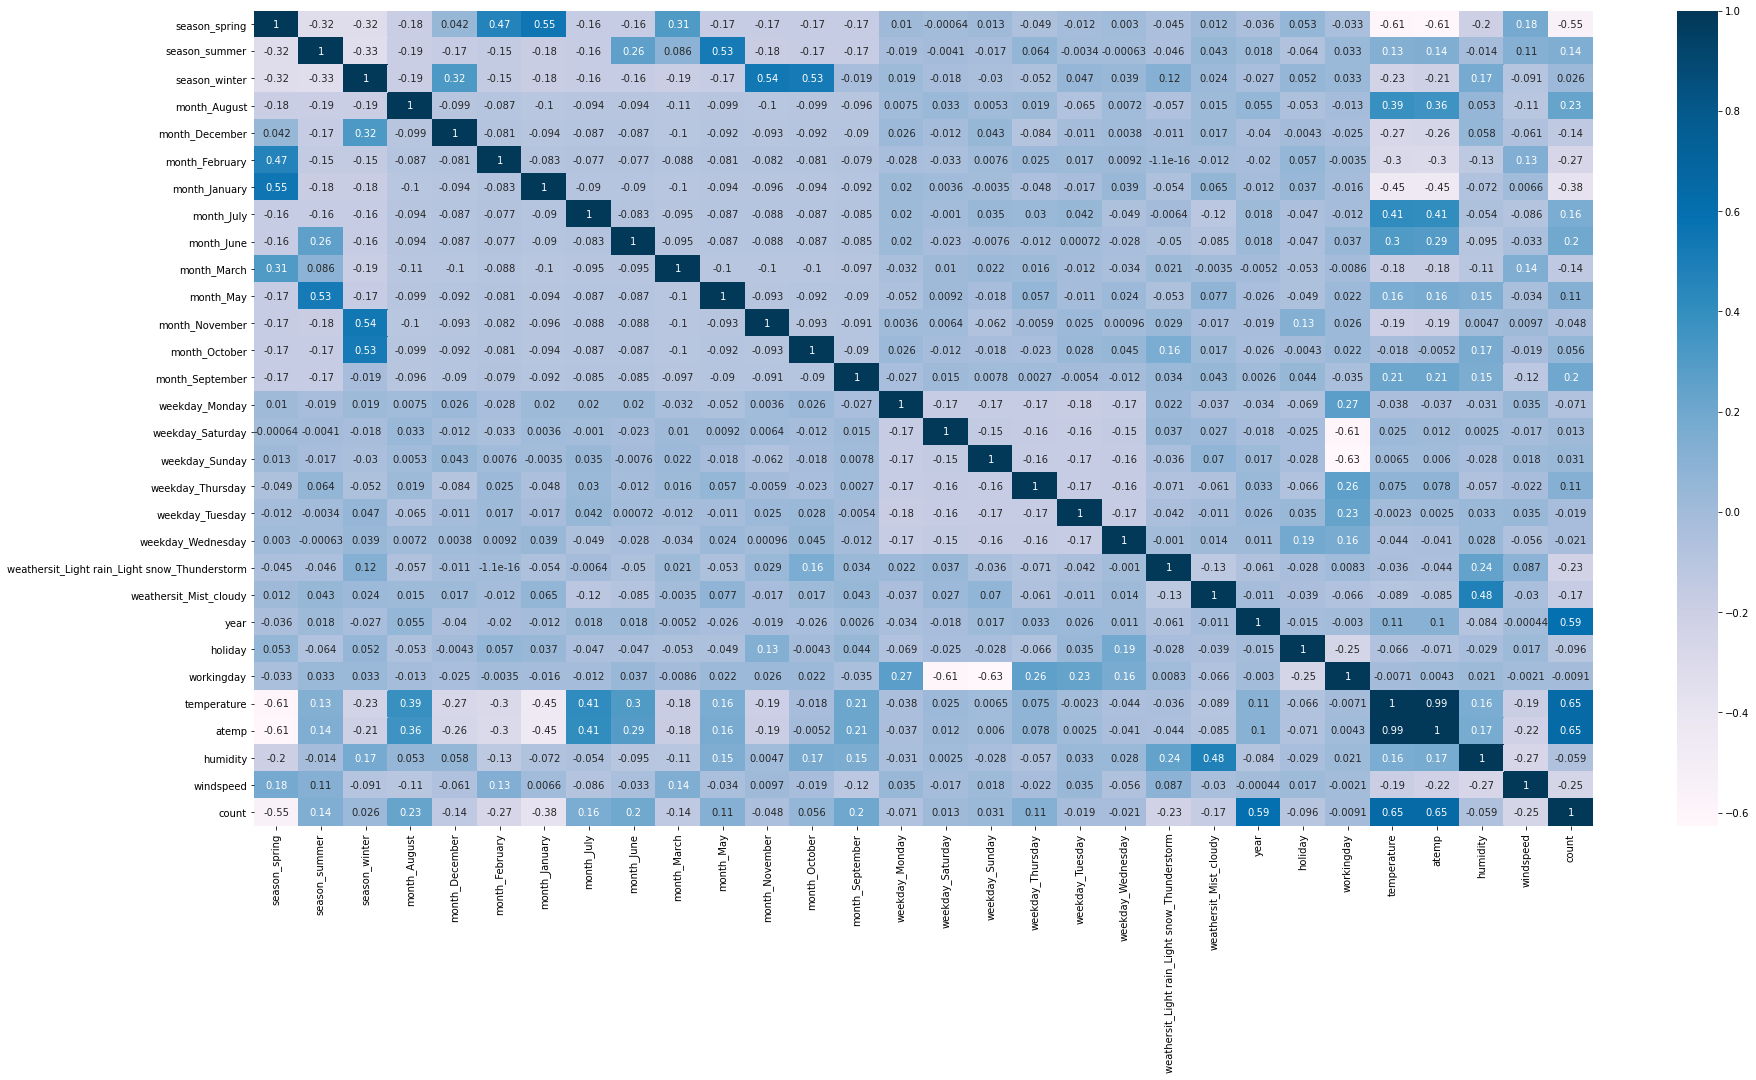

In [180]:
plt.figure(figsize=(30,15))
sns.heatmap(inp1_train.corr(), annot=True, cmap='PuBu');

Splitting the **inp1_train** dataset into **x_train** and **y_train** to build a model ahead.


In [181]:
#creating x_train & y_train
X_train = inp1_train
y_train = inp1_train.pop('count')

In [182]:
X_train.head()

,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,year,holiday,workingday,temperature,atemp,humidity,windspeed
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.345824,0.318819,0.751824,0.380981


In [183]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

# Building the model

Beginning with the **RFE** method of feature selection.

In [184]:
#importing important libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [185]:
#Selecting 50% variables to proceed with the RFE i.e 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [186]:
#variables selected by RFE :
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_August', False, 10),
 ('month_December', True, 1),
 ('month_February', False, 2),
 ('month_January', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 12),
 ('month_March', False, 15),
 ('month_May', False, 9),
 ('month_November', True, 1),
 ('month_October', False, 13),
 ('month_September', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 6),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temperature', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [187]:
#Selected columns  by RFE:
cols=X_train.columns[rfe.support_]
cols

Index(['season_spring', 'season_summer', 'season_winter', 'month_December',
       'month_January', 'month_July', 'month_November', 'month_September',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'year', 'holiday', 'temperature', 'humidity',
       'windspeed'],
      dtype='object')

In [188]:
#columns that aren't selected by the RFE:
X_train.columns[~rfe.support_]

Index(['month_August', 'month_February', 'month_June', 'month_March',
       'month_May', 'month_October', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

Proceeding with a new dataframe of columns that are selected by the **RFE**

In [189]:
#Creating X_train_RFE dataframe which consists of the features/columns selected by the RFE
X_train_RFE=X_train[cols]


In [190]:
X_train_RFE.shape

(510, 15)

In [191]:
#Import few important libraries to move ahead.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


For a smooth track, let's define functions for creating models and calculating the VIFs using **statsmodel.api**.

**Model building function**

In [192]:
def model_build(cols):
    X_train_sm = sm.add_constant(X_train_RFE)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

**VIF calculating function**

In [193]:
def calculated_vif(cols):
    df1 = X_train_RFE
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Model 1

In [194]:
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          8.15e-189
Time:                        21:01:40   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**-** We can see that **humidity** has a high VIF for which it could be dropped to build a further model.

## Model 2


In [195]:
#dropping humidity because of high VIF in the above model and building another model
X_train_RFE=X_train_RFE.drop(['humidity'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          4.75e-186
Time:                        21:01:42   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Model 3


In [196]:
#dropping windspeed because of highly negative coefficientt in the above model and building another model
X_train_RFE=X_train_RFE.drop(['windspeed'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          5.35e-179
Time:                        21:01:43   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Model 4 

In [197]:
#dropping weathersit_Light rain_Light snow_Thunderstorm because of highly negative coefficientt in the above model and building another model
X_train_RFE=X_train_RFE.drop(['weathersit_Light rain_Light snow_Thunderstorm'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     143.3
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          1.00e-152
Time:                        21:01:45   Log-Likelihood:                 420.20
No. Observations:                 510   AIC:                            -814.4
Df Residuals:                     497   BIC:                            -759.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

## Model 5


In [198]:
#dropping month_December because of high p-value in the above model and building another model
X_train_RFE=X_train_RFE.drop(['month_December'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          9.54e-154
Time:                        21:01:46   Log-Likelihood:                 419.99
No. Observations:                 510   AIC:                            -816.0
Df Residuals:                     498   BIC:                            -765.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

## Model 6 

In [199]:
#dropping month_January because of high p-value in the above model and building another model
X_train_RFE=X_train_RFE.drop(['month_January'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     172.2
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          9.82e-155
Time:                        21:01:48   Log-Likelihood:                 419.66
No. Observations:                 510   AIC:                            -817.3
Df Residuals:                     499   BIC:                            -770.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

## Model 7 

In [200]:
#dropping month_November because of high p-value in the above model and building another model
X_train_RFE=X_train_RFE.drop(['month_November'], axis=1)
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          9.72e-156
Time:                        21:01:49   Log-Likelihood:                 419.30
No. Observations:                 510   AIC:                            -818.6
Df Residuals:                     500   BIC:                            -776.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### In the above model VIF seems to be almost in the acceptable range and p-value for all the features is  almost 0.0-0.03.

#### The difference between the R square and Adj. R Square is  also negligibile.

#### So, we can take a call and make it our final model for the given project.




## Building the final callable model 

In [201]:
def build_final_model(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [202]:
lr = build_final_model(X_train_RFE,y_train)

#  Residual Analysis

In [203]:
y_train_pred = lr.predict(X_train_RFE)

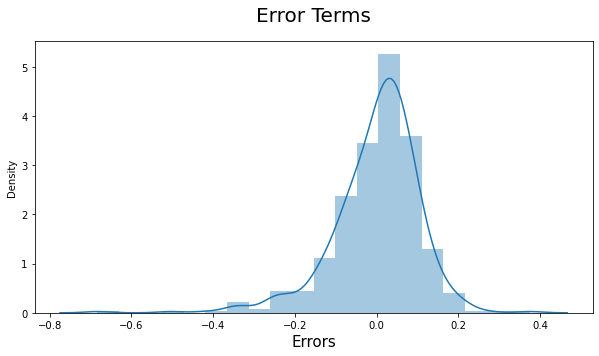

In [204]:
#Plotting the error terms
plt.figure(figsize=(10,5))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20, y=1.05)                  
plt.xlabel('Errors', fontsize = 15);

#### Error terms are normally distributed with a mean 0. So,  it seems to be fine.

# Predicting the model further:

In [205]:
num_vars=['temperature','humidity','windspeed','count', 'atemp']

#scaling the test sets
inp1_test[num_vars] = scaler.transform(inp1_test[num_vars])
inp1_test.head()

,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,year,holiday,workingday,temperature,atemp,humidity,windspeed,count
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.831783,0.001297,1.955914,0.039527,62.272198
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.901354,0.001616,1.808848,0.096398,64.003413
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0.511964,0.000098,2.517430,0.244062,27.400592
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.001409,1.270063,0.248450,49.257175
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.817246,0.001173,0.887696,0.410323,51.194486


**Splitting the test set into X_test and y_test**

In [206]:
#Dividing into X_test and y_test
y_test = inp1_test.pop('count')
X_test = inp1_test

**Prediction:**

In [207]:
#taking the columns from our final model
cols = ['temperature', 'year', 'season_summer',
        'month_July', 'weathersit_Mist_cloudy', 'season_winter',
       'season_spring', 'month_September', 'holiday']

#Predict the values for test data
lr1 = build_final_model(X_test[cols],y_test)
y_test_pred = lr1.predict(X_test[cols])

## Getting R^2 for test & train set

In [208]:
#importing the libraries
from sklearn.metrics import r2_score


**R^2 for test set**

In [209]:
r2_score(y_test,y_test_pred)

0.7877695505023793

**R^2 for test set**

In [210]:
r2_score(y_train,y_train_pred)

0.7750271421245369

# Evaluating the model

Text(0, 0.5, 'y_test_pred')

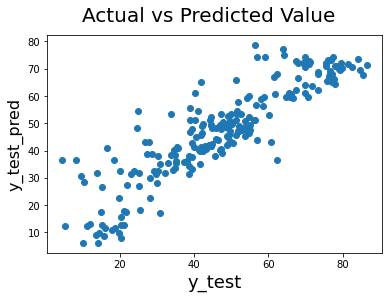

In [211]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Predicted Value', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16)

In [212]:
model_build(X_train_RFE)
calculated_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          9.72e-156
Time:                        21:02:09   Log-Likelihood:                 419.30
No. Observations:                 510   AIC:                            -818.6
Df Residuals:                     500   BIC:                            -776.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

We can see that the equation of our best fitted line is:
**count=  0.1267 +(0.5184 X temperature) + (0.2382 X year) + (0.0377 X season_summer) -0.0551 X month_july - 0.0640 X  weathersit_Mist_cloudy + (0.0726 X season_winter) -0.0709 X season_spring + (0.0720 X month_September) -0.0865 X holiday**

# Inferences :



*1)The bike sharing business by the company Boom bikes is highly affected by the variable temperature.*

*2) The bikes were usually shared in the month of Septmeber followed by july. So, it's better to launch in those month of the year.*

*3) The bikes were usually less shared in holidays.*
